In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-5-f51e9d6a91d8>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['order_date'] = pd.to_datetime(data['order_date'])


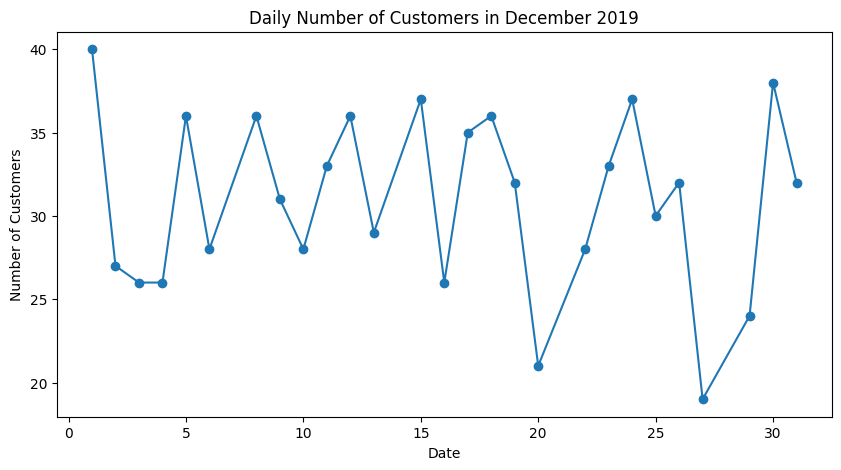

In [5]:
data=pd.read_csv('/content/retail_raw_reduced_data_quality.csv')

# Mengubah kolom 'order_date' menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Filter data untuk bulan Desember 2019
data_december = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung jumlah unique customers per tanggal
daily_customers = data_december.groupby(data_december['order_date'].dt.day)['customer_id'].nunique()

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Membuat line chart
plt.plot(daily_customers.index, daily_customers.values, marker='o')

# Memberikan judul dan label sumbu
plt.title('Daily Number of Customers in December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')

# Menampilkan line chart
plt.show()


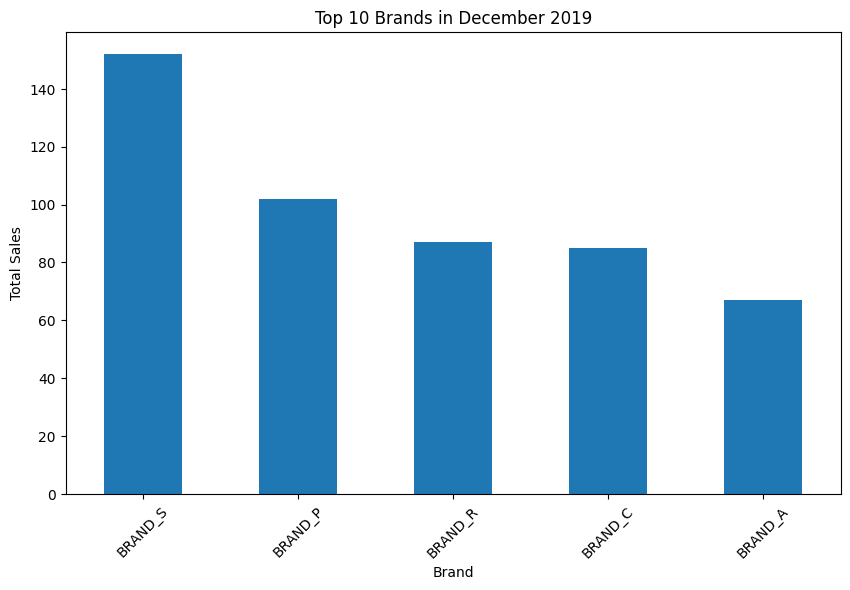

In [6]:
data_december = data[(data['order_date'].dt.month == 12)]

brand_sales = data_december.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

top_5_brands = brand_sales.head(5)

plt.figure(figsize=(10, 6))
top_5_brands.plot(kind='bar')
plt.title('Top 10 Brands in December 2019')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

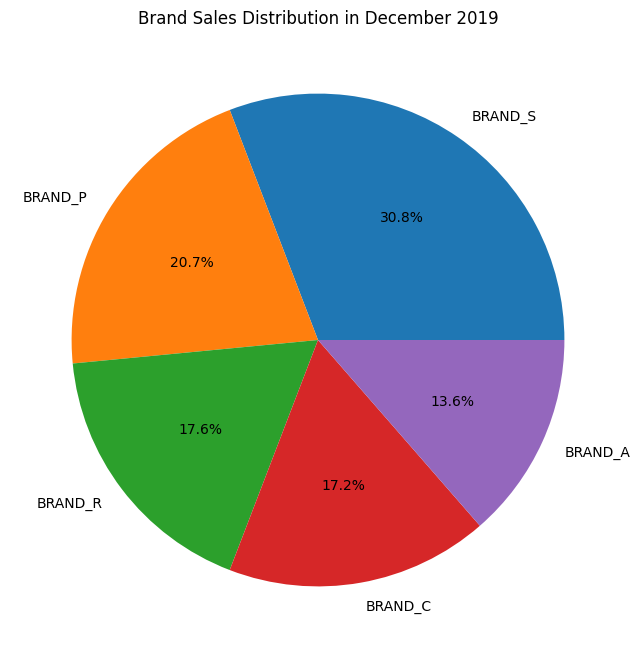

In [7]:
plt.figure(figsize=(8, 8))
top_5_brands.plot(kind='pie', autopct='%1.1f%%')
plt.title('Brand Sales Distribution in December 2019')
plt.ylabel('')
plt.show()

In [8]:
data_december = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

brand_quantity = data_december.groupby('brand')['quantity'].sum().sort_values(ascending=False)

top_5_brands = brand_quantity.head(5)

dataset_top5brand_dec = data_december[data_december['brand'].isin(top_5_brands.index)]

print("Top 5 brands in December 2019:")
print(top_5_brands)

Top 5 brands in December 2019:
brand
BRAND_S    2191.0
BRAND_P    2188.0
BRAND_R    1506.0
BRAND_C    1365.0
BRAND_A    1303.0
Name: quantity, dtype: float64


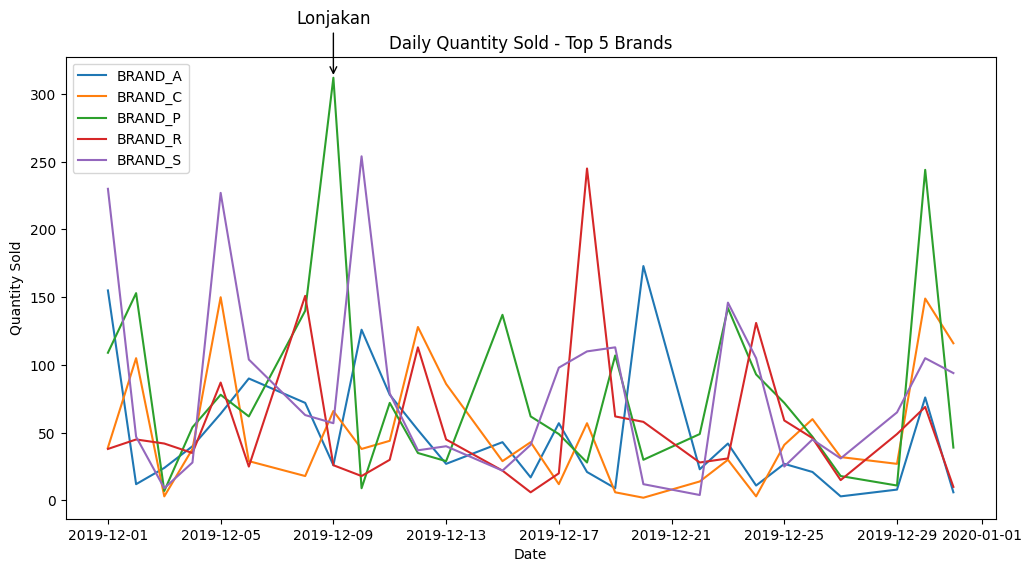

In [9]:
import seaborn as sns

# Menghitung jumlah quantity terjual per tanggal dan per brand
daily_quantity = dataset_top5brand_dec.groupby(['order_date', 'brand'])['quantity'].sum().reset_index()

# Membuat multi-line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date', y='quantity', hue='brand', data=daily_quantity)

# Mencari tanggal dengan lonjakan quantity terjual
max_quantity_date = daily_quantity[daily_quantity['quantity'] == daily_quantity['quantity'].max()]['order_date'].values[0]

# Menambahkan anotasi pada tanggal dengan lonjakan
plt.annotate('Lonjakan', xy=(max_quantity_date, daily_quantity['quantity'].max()),
             xytext=(max_quantity_date, daily_quantity['quantity'].max() + 40),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

# Memberikan judul dan label sumbu
plt.title('Daily Quantity Sold - Top 5 Brands')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Menampilkan legend
plt.legend()

# Menampilkan multi-line chart
plt.show()

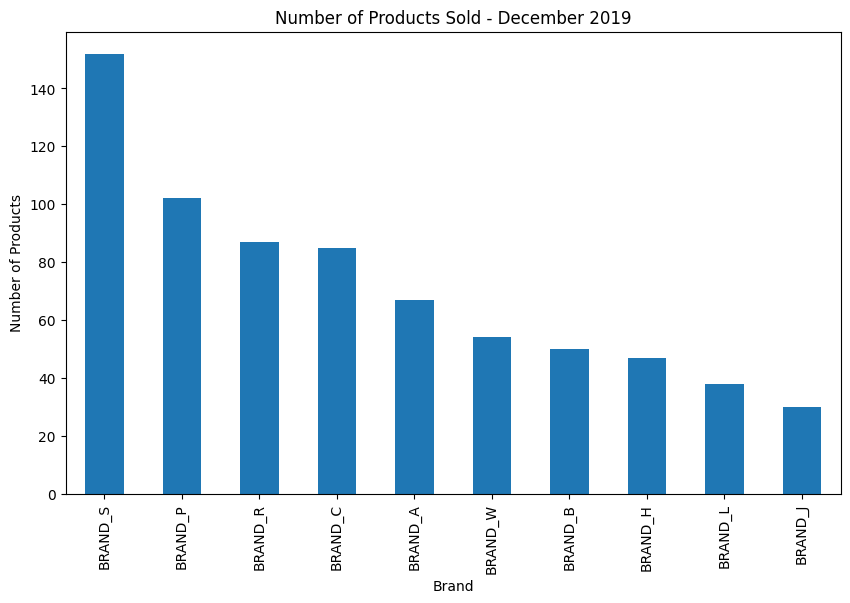

In [11]:
# Menghitung jumlah produk terjual per brand
product_count = data_december.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 6))
product_count.plot(kind='bar')

# Memberikan judul dan label sumbu
plt.title('Number of Products Sold - December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()

<Figure size 1000x600 with 0 Axes>

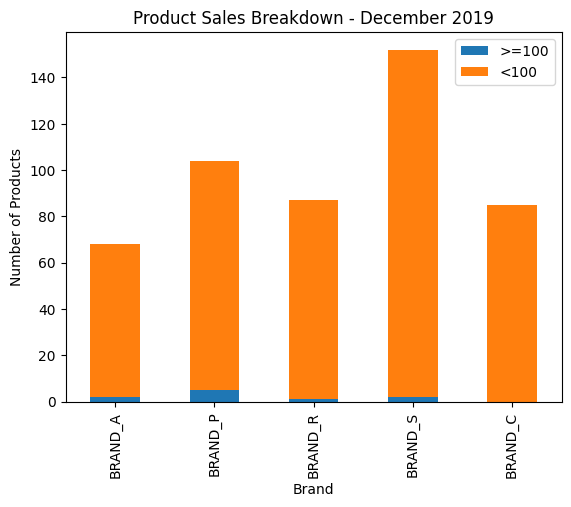

In [12]:
# Filter data untuk produk dengan penjualan di atas atau sama dengan 100
above_100 = dataset_top5brand_dec[dataset_top5brand_dec['quantity'] >= 100]

# Filter data untuk produk dengan penjualan di bawah 100
below_100 = dataset_top5brand_dec[dataset_top5brand_dec['quantity'] < 100]

# Menghitung jumlah produk dengan penjualan di atas atau sama dengan 100 per brand
above_100_count = above_100.groupby('brand')['product_id'].nunique()

# Menghitung jumlah produk dengan penjualan di bawah 100 per brand
below_100_count = below_100.groupby('brand')['product_id'].nunique()

# Menggabungkan kedua DataFrame
stacked_data = pd.concat([above_100_count, below_100_count], axis=1, keys=['>=100', '<100'])

# Membuat stacked chart
plt.figure(figsize=(10, 6))
stacked_data.plot(kind='bar', stacked=True)

# Memberikan judul dan label sumbu
plt.title('Product Sales Breakdown - December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products')

# Menampilkan legend
plt.legend()

# Menampilkan
plt.show()

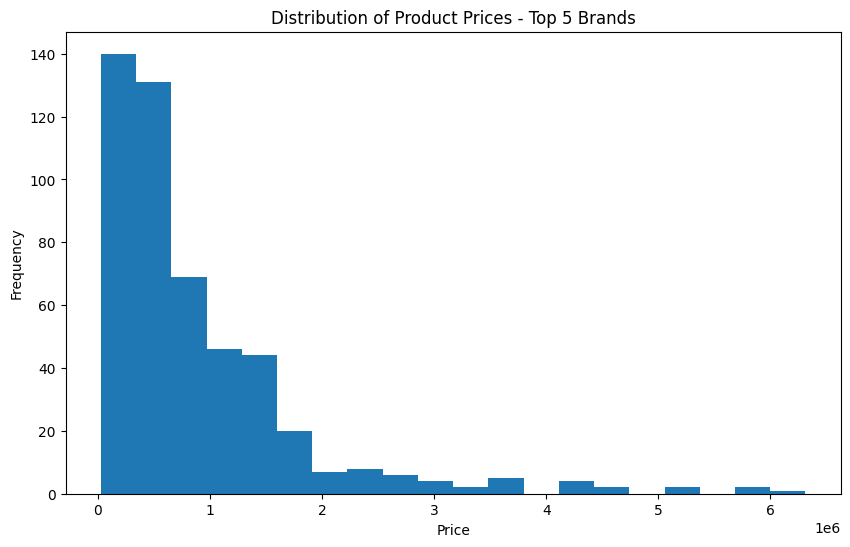

In [13]:
# Menghitung median harga per product_id dalam top 5 brand
median_prices = dataset_top5brand_dec.groupby('product_id')['item_price'].median()

# Membuat histogram
plt.figure(figsize=(10, 6))
plt.hist(median_prices, bins=20)

# Memberikan judul dan label sumbu
plt.title('Distribution of Product Prices - Top 5 Brands')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Menampilkan histogram
plt.show()

<ipython-input-14-1d3ce94fa937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top5brand_dec['GMV'] = dataset_top5brand_dec['item_price'] * dataset_top5brand_dec['quantity']


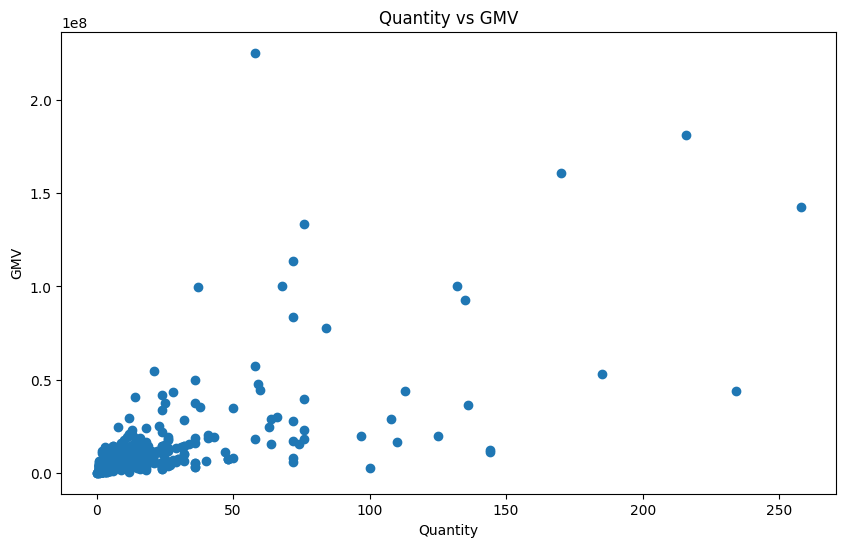

In [14]:
# Membuat kolom GMV
dataset_top5brand_dec['GMV'] = dataset_top5brand_dec['item_price'] * dataset_top5brand_dec['quantity']

# Menggabungkan data quantity dan GMV per product_id
product_stats = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'GMV': 'sum'})

# Membuat scatter plot antara quantity dan GMV
plt.figure(figsize=(10, 6))
plt.scatter(product_stats['quantity'], product_stats['GMV'])

# Memberikan judul dan label sumbu
plt.title('Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')

# Menampilkan scatter plot
plt.show()

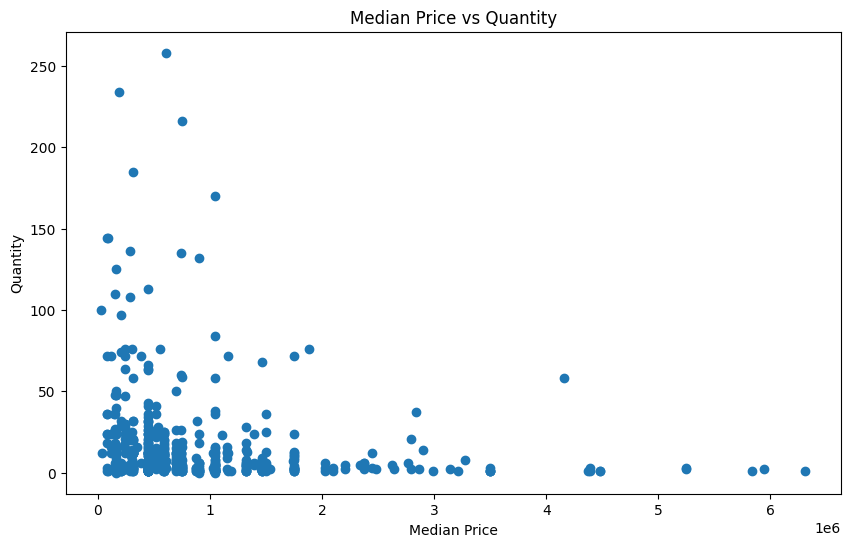

In [15]:
# Menggabungkan data quantity dan median harga per product_id
product_stats = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'item_price': 'median'})

# Membuat scatter plot antara median harga dan quantity
plt.figure(figsize=(10, 6))
plt.scatter(product_stats['item_price'], product_stats['quantity'])

# Memberikan judul dan label sumbu
plt.title('Median Price vs Quantity')
plt.xlabel('Median Price')
plt.ylabel('Quantity')

# Menampilkan scatter plot
plt.show()